**Classification:**

In this session supervised classification models such as Naive Bayes, and Gaussian process models will be created and their prediction performance on a test set will be evaluated. You can find the dataset here: [nasa.csv ](https://drive.google.com/file/d/1JPUOwwIuFbyIWPNyMCWj78S-CIuqb75d/view?usp=sharing).

Import Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics, naive_bayes

###Read the Data:

In [ ]:
# Nasa Dataset
classification_data = pd.read_csv("/content/nasa.csv")

print(classification_data.columns)
classification_data.head(3)

Index(['Name', 'Eccentricity', 'Inclination', 'Hazardous', 'Neo Reference ID',
       'Absolute Magnitude', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Semi Major Axis', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')


,Name,Eccentricity,Inclination,Hazardous,Neo Reference ID,Absolute Magnitude,Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,...,Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3723955,0.351674,28.412996,0,3723955,21.3,479.225620,1071.581063,12784,7.890000e+11,...,5.457,1.107776,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330
1,2446862,0.348248,4.237961,1,2446862,20.3,759.521423,1698.341531,12791,7.900000e+11,...,4.557,1.458824,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371
2,3671135,0.563441,17.927751,0,3671135,19.6,1048.431420,2344.363926,12798,7.900000e+11,...,4.724,1.323532,178.971951,556.160556,0.577800,198.145969,2.069265,2458009.403,354.237368,0.647295


###Randomly split the data into train and test subsets

In [ ]:
from sklearn.model_selection import train_test_split

X = classification_data.drop(["Name", "Hazardous"], axis = 1)
y = classification_data["Hazardous"]

print(f"Shape of dataset: {classification_data.shape}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(f"Shape of X_train: {X_train.shape}")

Shape of dataset: (462, 27)
Shape of X: (462, 25)
Shape of y: (462,)
Shape of X_train: (369, 25)


If you have any categorical variables as feature, you should convert them to dummy variables using `pd.get_dummies(data, drop_first=True)`.

## Naive Bayes

We will use the classification data as above. Refer to [sklearn documentation](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) for Naive Bayes.

###Train Naive Bayes classifier:

In [ ]:
# create Naive Bayes classifier
Naive_bayes_G = naive_bayes.GaussianNB()
Naive_bayes_M = naive_bayes.MultinomialNB()

# fit the classifier to your training data
Naive_bayes_G.fit(X_train, y_train)
Naive_bayes_M.fit(X_train, y_train)

MultinomialNB()

###Test the prediction performance:


In [ ]:
y_pred_G = Naive_bayes_G.predict(X_test)
print(y_pred_G)

probalilities_G = Naive_bayes_G.predict_proba(X_test)
print(f"Estiamted Probabilities:{probalilities_G[:10]}")

y_pred_M = Naive_bayes_M.predict(X_test)
probalilities_M = Naive_bayes_M.predict_proba(X_test)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0]
Estiamted Probabilities:[[0.64224237 0.35775763]
 [0.63088663 0.36911337]
 [0.64566387 0.35433613]
 [0.5734463  0.4265537 ]
 [0.57193115 0.42806885]
 [0.40710715 0.59289285]
 [0.6241649  0.3758351 ]
 [0.62830516 0.37169484]
 [0.50485965 0.49514035]
 [0.64948842 0.35051158]]


The `roc_auc_score` function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions.

Performance of GuassianNB:

In [ ]:
y_test == y_pred_G

49      True
85     False
34      True
231    False
236     True
       ...  
352    False
337    False
142    False
125    False
151     True
Name: Hazardous, Length: 93, dtype: bool

In [ ]:
# using sklearn metrics
acc = (y_test == y_pred_G).mean()
print(f"Calculated Accuracy: {acc}\n")
acc1 = metrics.accuracy_score(y_test, y_pred_G)
print(f"Accuracy: {acc1}\n")

auc = metrics.roc_auc_score(y_test, probalilities_G[:, 1])
print(f"Area Under ROC curve (AUC): {auc}\n")

confusion_mat = metrics.confusion_matrix(y_test, y_pred_G)
confusion_mat

Calculated Accuracy: 0.6129032258064516

Accuracy: 0.6129032258064516

Area Under ROC curve (AUC): 0.6909430438842203



array([[37,  5],
       [31, 20]])

Performance of MultinomialNB:

Accuracy: 0.6236559139784946

Area Under ROC curve (AUC): 0.6295518207282913

[[29 13]
 [22 29]]


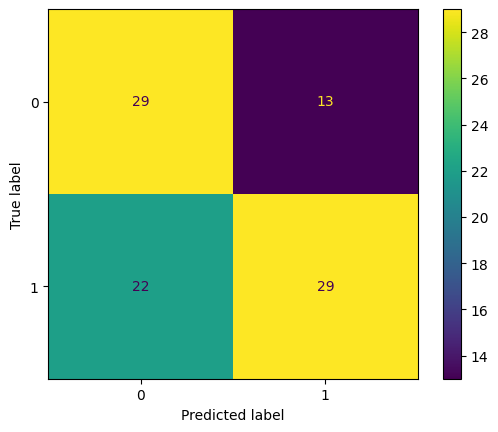

In [ ]:
acc1 = metrics.accuracy_score(y_test, y_pred_M)
print(f"Accuracy: {acc1}\n")

auc = metrics.roc_auc_score(y_test, probalilities_M[:, 1])
print(f"Area Under ROC curve (AUC): {auc}\n")

confusion_mat = metrics.confusion_matrix(y_test, y_pred_M)
print(confusion_mat)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_M)

Find TP, TN, FP, and FN to calculate Sensitivity, Specificity, and Precision:

In [ ]:
tn, fp, fn, tp = confusion_mat.ravel()

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print(f"sensitivity: {sensitivity}") # Recall
print(f"specificity: {specificity}") # Precision
print(metrics.classification_report(y_test, y_pred_M))

sensitivity: 0.5686274509803921
specificity: 0.6904761904761905
              precision    recall  f1-score   support

           0       0.57      0.69      0.62        42
           1       0.69      0.57      0.62        51

    accuracy                           0.62        93
   macro avg       0.63      0.63      0.62        93
weighted avg       0.64      0.62      0.62        93



Plot the ROC curve:

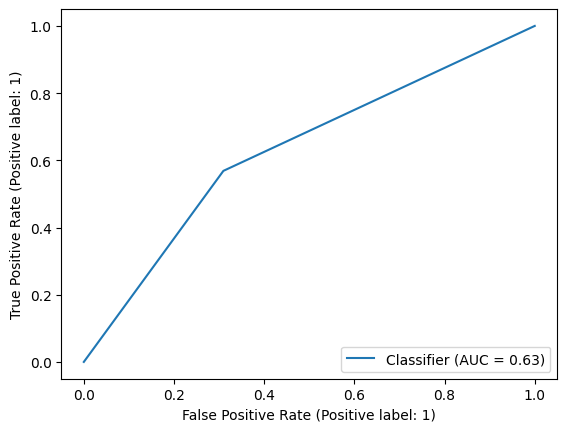

In [ ]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred_M)

Which Classification model performs better on Nasa's comet classification task?

## Gaussian Processes (Classification & Regression)

Sklearn [documentations](https://scikit-learn.org/stable/modules/gaussian_process.html) on Gaussian Process.


*   Kernel Options [link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process.kernels)



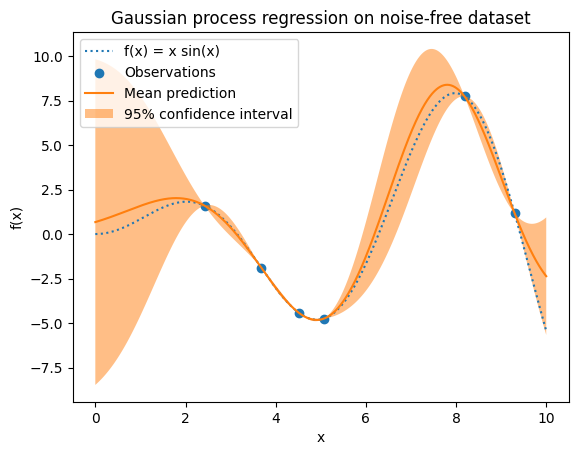

In [ ]:
# GP Regression with non-noisy data (drawn from sklearn documentations)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X)) # np.squeeze(a, axis=None): Remove axes of length one from a.
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]


kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label="f(x) = x sin(x)", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(), # returns contiguous flattened array(1D array with all the input-array elements
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5, # controls the transparency of color
    label="95% confidence interval",
)
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [ ]:
# @title with noisy targets
# GP Regression Example with noisy targets (drawn from sklearn documentations)

noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9  # alpha: variance of additional Gaussian measurement noise on the training observations
)
gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label="$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label="95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")

**Classification:**

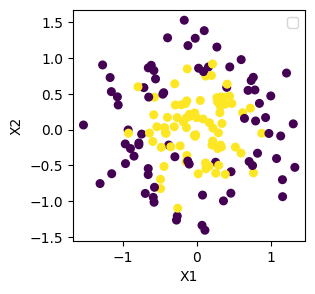

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=150, noise=0.25, factor=0.5)

plt.figure(figsize=(3,3))
plt.scatter(X[:, 0], X[:, 1], s=30, c=y)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


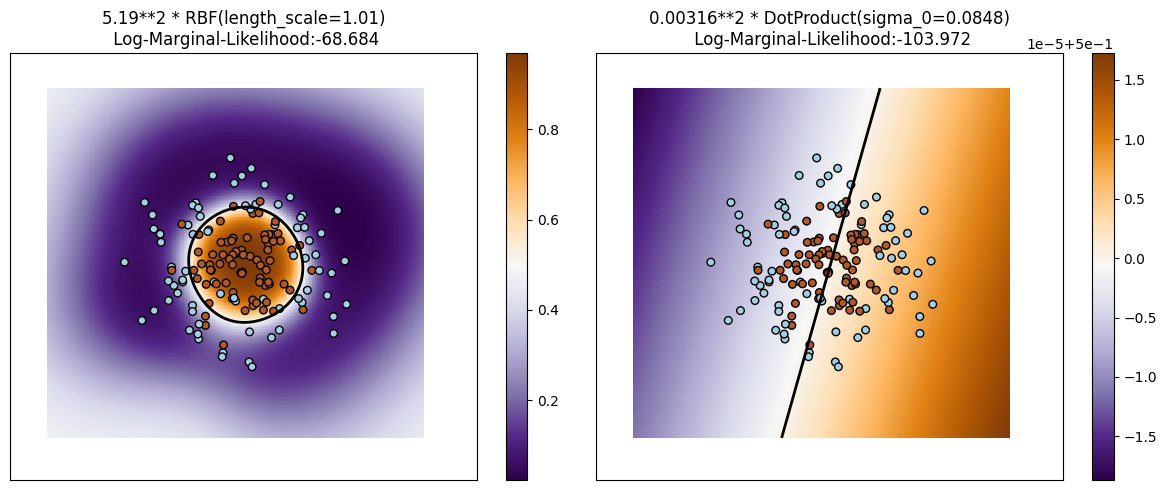

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct


# Set up a meshgrid for plotting decision boundaries
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# fit the model
plt.figure(figsize=(12, 5))

kernels = [1.0 * RBF(length_scale=1.15), 1.0 * DotProduct(sigma_0=1.2)] # the kernel's hyperparameters will be optimized during fitting.
for i, kernel in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel, warm_start=True)
    clf.fit(X, y)

    # plot the decision function
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # column-wise concatenation
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 2, i + 1) # The subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right.
    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors=["k"])
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors=(0, 0, 0))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(
        f"{clf.kernel_}\n Log-Marginal-Likelihood:{clf.log_marginal_likelihood(clf.kernel_.theta):.3f}",
        fontsize=12,
    )

plt.tight_layout()
plt.show()

Make predictions on the test set and evaluate the model:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
kernel = 1.0 * RBF(length_scale=1.15)
clf = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X_train, y_train)

y_preds = clf.predict(X_test)

print(f"y_test : {y_test[:10]}")
print(f"y_preds : {y_preds[:10]}")

y_probs = clf.predict_proba(X_test)

acc = metrics.accuracy_score(y_test, y_preds)
print(f"accuracy: {acc:.3f}")

y_test : [1 1 1 1 0 0 0 1 0 1]
y_preds : [1 1 1 1 0 1 0 1 0 0]
accuracy: 0.800
